# Marketing Analytics for mock sample data set for customers

We need to identify the following here basis the raw data:
Visualize - 
1. Distribution of acquisition cost 
2. Distribution of Revenue
3. Customer Acquisition Cost By Channel
4. Conversion Rate
5. Total Revenue By Channel
6. ROAS for different channels
7. CLTV Distribution for different channels
 

In [61]:
import pandas as pd
import plotly.graph_objs as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_white"

In [63]:
data = pd.read_csv("C:\\Users\\abhin\\Documents\\Python_Resources\\Capstone\\Customer_Lifetime_Value\\customer_acquisition_data.csv")
pd.options.display.float_format = "{:,.2f}".format

In [65]:
print(data.head())

   customer_id           channel  cost ($)  conversion_rate (%)  revenue ($)
0            1          referral      8.32                 0.12         4199
1            2  paid advertising     30.45                 0.02         3410
2            3   email marketing      5.25                 0.04         3164
3            4      social media      9.55                 0.17         1520
4            5          referral      8.32                 0.12         2419


#### Visualizing the Distribution of Acquisition
***
Here we attempt to visualize the distribution of acquisition cost for the data set shared

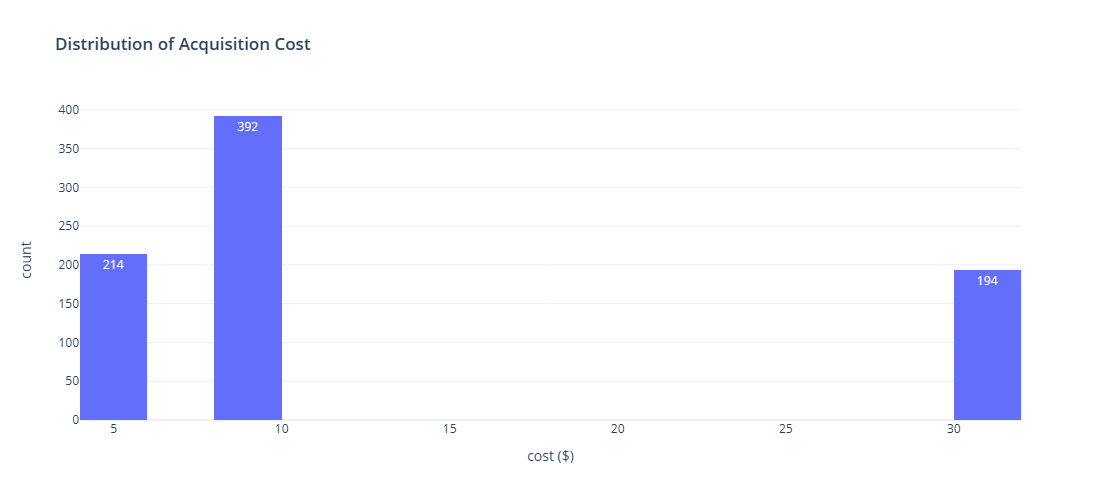

In [110]:
fig = px.histogram(data, 
                   x="cost ($)",
                   nbins=15, 
                   title='<b>Distribution of Acquisition Cost</b>', text_auto =True)
fig.update_layout(autosize = False, width =  900, height = 500)
fig.show()

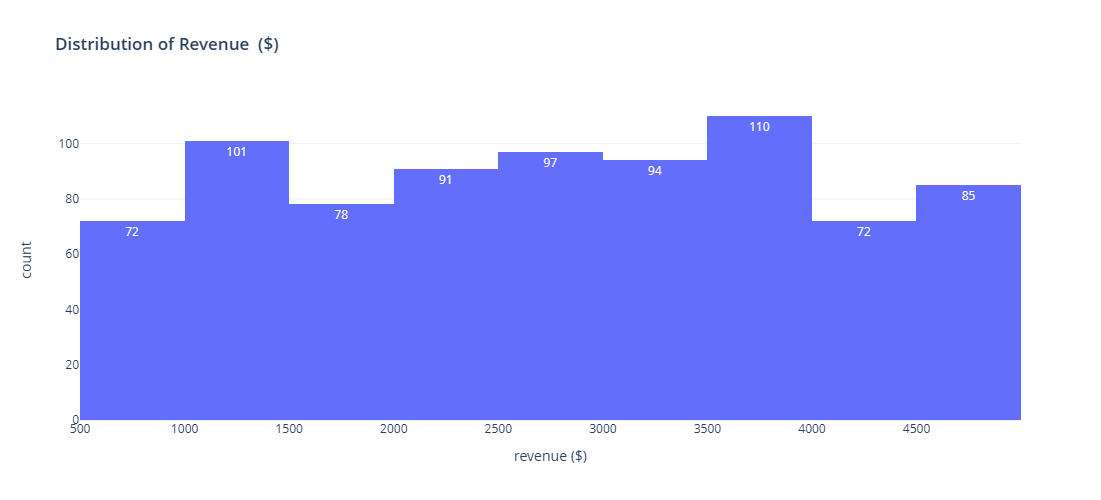

In [112]:
fig = px.histogram(data, 
                   x="revenue ($)", 
                   nbins=20, 
                   title='<B>Distribution of Revenue  ($)</B>',text_auto=True)
fig.update_layout(autosize = False, width =  900, height = 500)
fig.show()

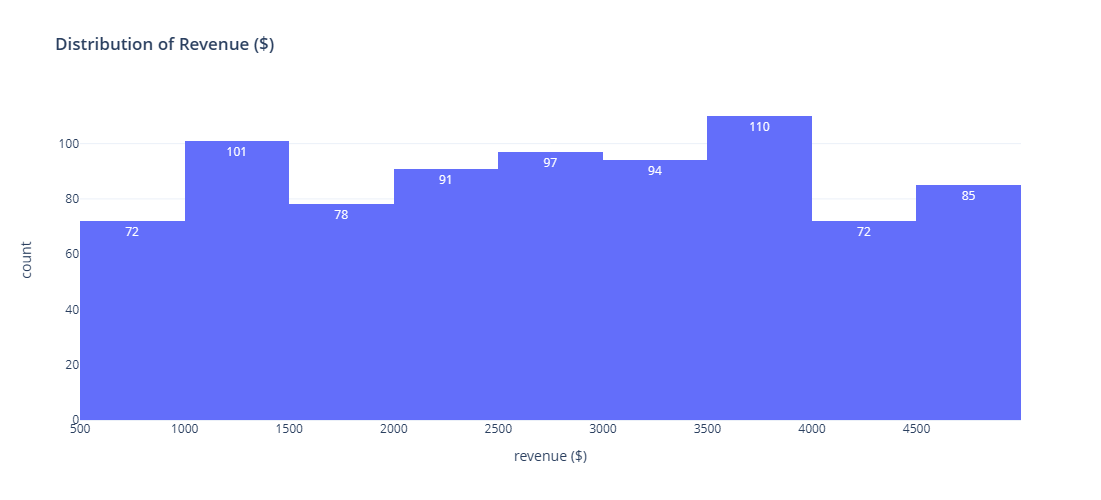

In [114]:
# data.

fig = px.histogram(data, 
                   x="revenue ($)", 
                   nbins=20, 
                   title='<B>Distribution of Revenue ($)</B>',text_auto=True)
fig.update_layout(autosize = False, width =  900, height = 500)
fig.show()

#### Average Customer Acquistion Cost by Channel
***

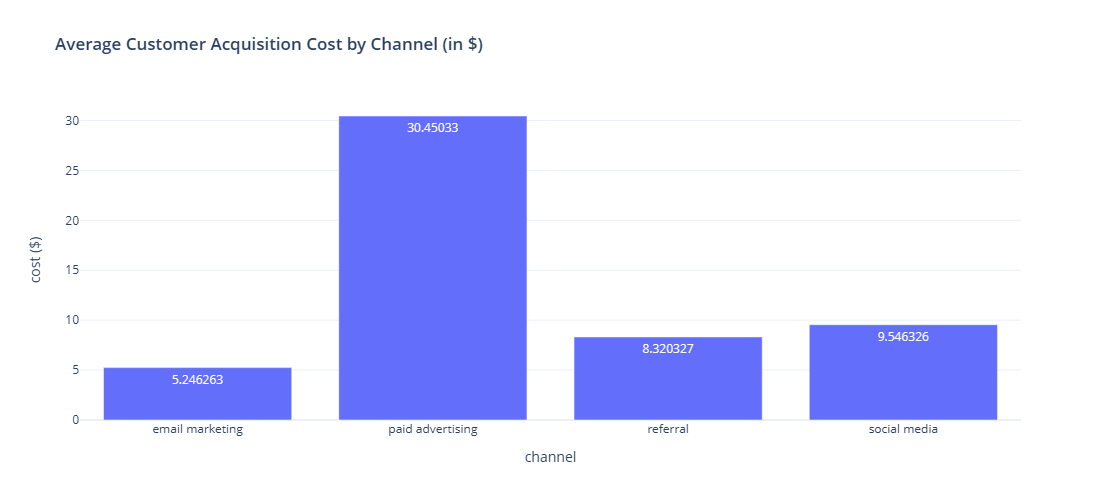

In [116]:
cost_by_channel = data.groupby('channel')['cost ($)'].mean().reset_index()

# channel   cost ($)  conversion_rate (%)  revenue ($)

fig = px.bar(cost_by_channel, 
             x='channel', 
             y='cost ($)', 
             title='<b>Average Customer Acquisition Cost by Channel (in $)</b>', text_auto=True)

fig.update_layout(autosize = False, width =  900, height = 500)
fig.show()

#### Conversion Rate by Channel
***

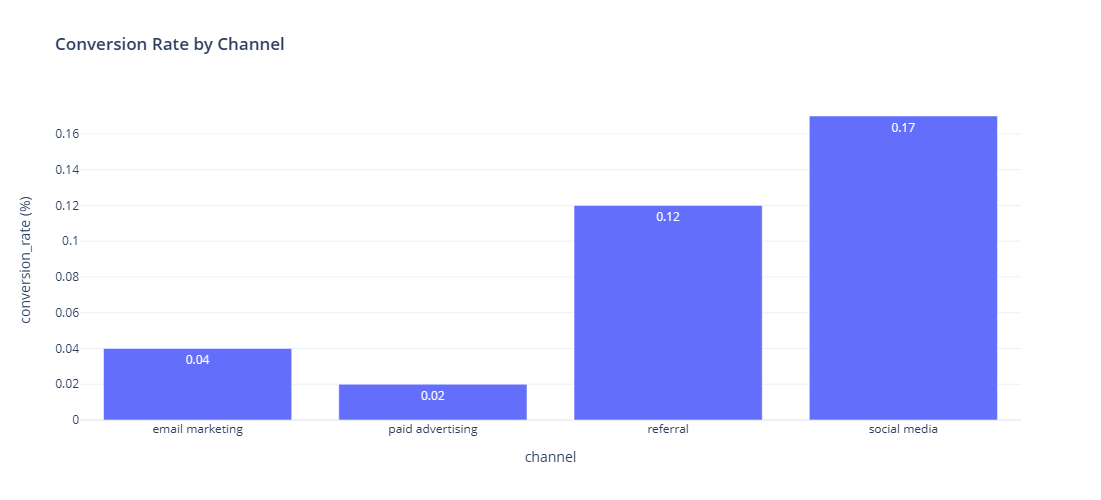

In [30]:
conversion_by_channel = round (data.groupby('channel')['conversion_rate (%)'].mean().reset_index(),2)

fig = px.bar(conversion_by_channel, x='channel', 
             y='conversion_rate (%)', 
             title='<b>Conversion Rate by Channel</b>', text_auto=True)
fig.update_layout(autosize = False, width =  1000, height = 500)
fig.show()

#### Share of Revenue by Channel
***

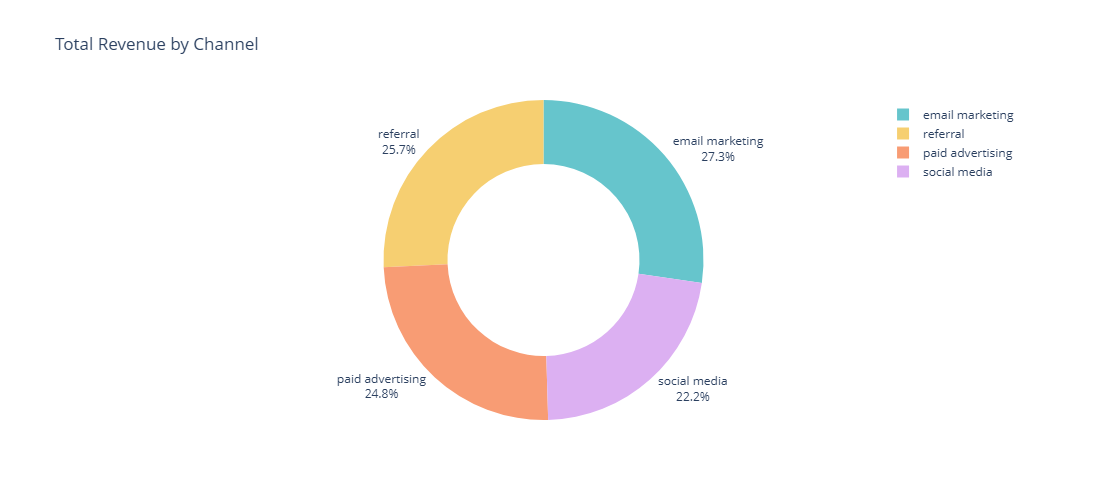

In [52]:
revenue_by_channel = data.groupby('channel')['revenue ($)'].sum().reset_index()

fig = px.pie(revenue_by_channel, 
             values='revenue ($)', 
             names='channel', 
             title='Total Revenue by Channel', 
             hole=0.6, color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_traces(textposition='outside', textinfo='percent+label')
# fig.update_layout(title='Bold Title - Graphs', title_font=dict(family='Arial Black', size=24))
fig.update_layout(autosize = False, width =  1000, height = 500,)
fig.show()

#### Return on INvesmtent by Channel
***

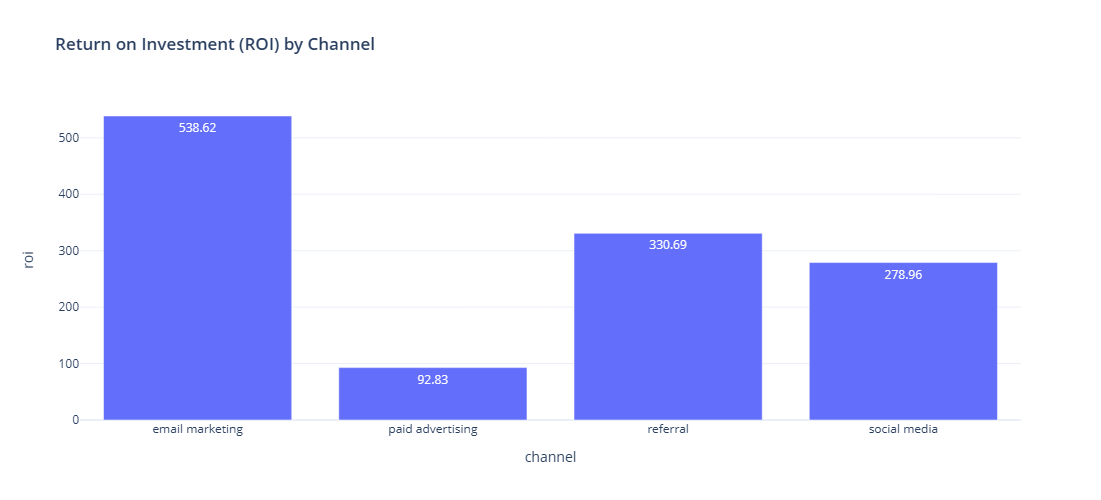

In [89]:
data['roi'] = data['revenue ($)'] / data['cost ($)']
roi_by_channel = round(data.groupby('channel')['roi'].mean().reset_index(),2)

fig = px.bar(roi_by_channel, 
             x='channel', 
             y='roi', title='<b>Return on Investment (ROI) by Channel</b>',text_auto=True)
# fig.update_layout(title='Bold Title - Graphs', title_font=dict(family='Arial Black', size=24))
fig.update_layout(autosize = False, width =  1000, height = 500,)
fig.show()

#### CLTV
***
The ROI from email marketing is way higher than all other channels, while the ROI from paid advertising is the lowest. Now let’s calculate the customer lifetime value from each channel. Based on the data we have, we can use the formula mentioned below to calculate CLTV:<br>

**CLTV = (revenue – cost) * conversion_rate / cost**st

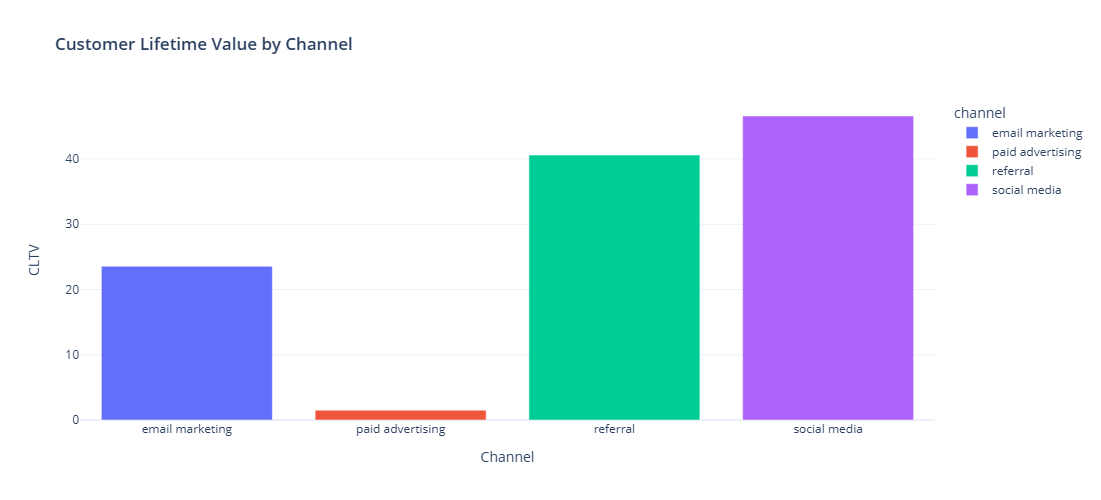

In [111]:
data['cltv'] = (data['revenue ($)'] - data['cost ($)']) * data['conversion_rate (%)'] / data['cost ($)']

channel_cltv = data.groupby('channel')['cltv'].mean().reset_index()

fig = px.bar(channel_cltv, x='channel', y='cltv', color='channel',
             title='<b>Customer Lifetime Value by Channel</b>')

fig.update_xaxes(title='Channel')
fig.update_yaxes(title='CLTV')
fig.update_layout(autosize = False, width =  1000, height = 500)
fig.show()